In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [2]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [4]:
df= pd.read_csv("EuroMillions_numbers.csv")
df

,Date,N1,N2,N3,N4,N5,E1,E2,Winner,Gain
0,24/12/2004,3,27,29,4,37,6,5,1,10000000
1,17/12/2004,49,22,19,15,46,9,2,1,26215627
2,26/11/2004,24,1,34,4,36,8,6,1,43756502
3,22/10/2004,9,25,1,40,23,3,9,1,25059130
4,10/01/2004,48,20,45,21,12,6,5,1,29785269
...,...,...,...,...,...,...,...,...,...,...
1313,15/01/2021,4,10,27,38,40,3,11,0,56331898
1314,01/12/2021,2,10,18,34,35,6,9,0,41607178
1315,01/08/2021,18,23,37,41,42,4,6,0,30824040
1316,01/05/2021,12,34,37,38,42,1,3,0,17000000


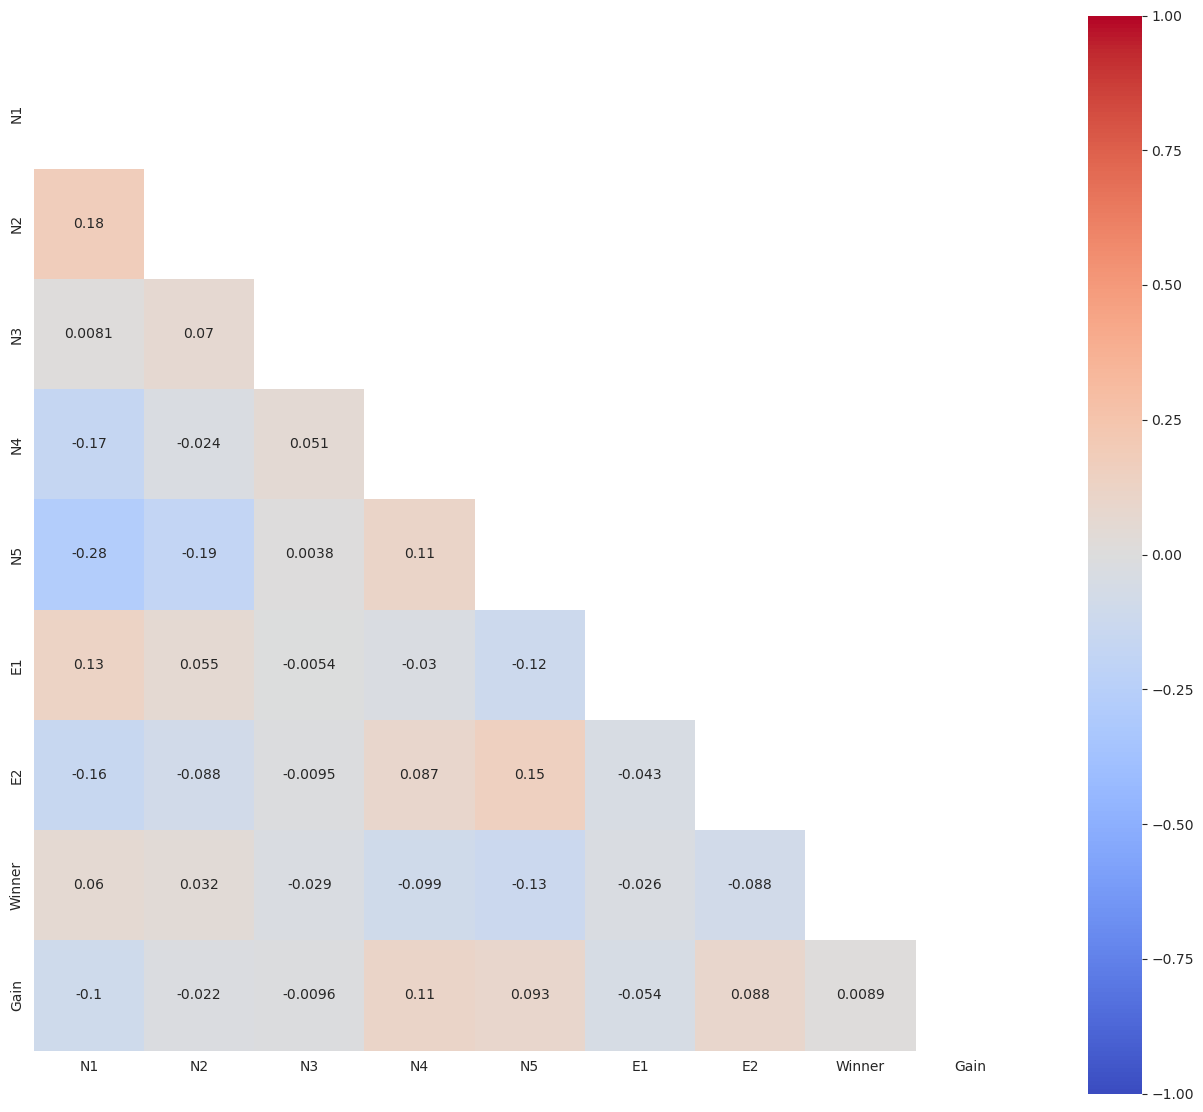

In [5]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # trick to filter out the upper-right triangle, which is redundant due to symmetry
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 14))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [7]:
CORR_THRESH = 0.80
corr_matrix=df.corr().abs()  #abs stands for absolute
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
corrd_cols = [column for column in upper_triangle.columns if any(upper_triangle[column] > CORR_THRESH)]
df.drop(corrd_cols,axis=1,inplace=True)
df.columns

Index(['Date', 'N1', 'N2', 'N3', 'N4', 'N5', 'E1', 'E2', 'Winner', 'Gain'], dtype='object')

In [8]:
import pandas as pd


value_counts = df['N1'].value_counts()

# Retrieve the value with the highest count
most_frequent_value = value_counts.idxmax()

print(most_frequent_value)


1


In [9]:
value_counts = df['N2'].value_counts()

# Retrieve the value with the highest count
most_frequent_value = value_counts.idxmax()

print(most_frequent_value)


10


In [10]:
value_counts = df['N3'].value_counts()

# Retrieve the value with the highest count
most_frequent_value = value_counts.idxmax()

print(most_frequent_value)


27


In [11]:
value_counts = df['N4'].value_counts()

# Retrieve the value with the highest count
most_frequent_value = value_counts.idxmax()

print(most_frequent_value)


38


In [12]:
value_counts = df['N5'].value_counts()

# Retrieve the value with the highest count
most_frequent_value = value_counts.idxmax()

print(most_frequent_value)


49


In [13]:
value_counts = df['E1'].value_counts()

# Retrieve the value with the highest count
most_frequent_value = value_counts.idxmax()

print(most_frequent_value)


2


In [14]:
value_counts = df['E2'].value_counts()

# Retrieve the value with the highest count
most_frequent_value = value_counts.idxmax()

print(most_frequent_value)


8


In [15]:
value_counts = df['N1'].value_counts()

# Retrieve the value with the highest count
least_frequent_value = value_counts.idxmin()

print(least_frequent_value)


48


In [16]:
value_counts = df['N2'].value_counts()

# Retrieve the value with the highest count
least_frequent_value = value_counts.idxmin()

print(least_frequent_value)

46


In [17]:
value_counts = df['N3'].value_counts()

# Retrieve the value with the highest count
least_frequent_value = value_counts.idxmin()

print(least_frequent_value)

46


In [18]:
value_counts = df['N4'].value_counts()

# Retrieve the value with the highest count
least_frequent_value = value_counts.idxmin()

print(least_frequent_value)

18


In [19]:
value_counts = df['N5'].value_counts()

# Retrieve the value with the highest count
least_frequent_value = value_counts.idxmin()

print(least_frequent_value)

22


In [20]:
value_counts = df['E1'].value_counts()

# Retrieve the value with the highest count
least_frequent_value = value_counts.idxmin()

print(least_frequent_value)

12


In [22]:
value_counts = df['E2'].value_counts()

# Retrieve the value with the highest count
least_frequent_value = value_counts.idxmin()

print(least_frequent_value)

12


In [25]:
max_com = {'N1': 1, 'N2' : 10, 'N3' : 27, 'N4' : 38, 'N5' : 49, 'E1' : 2, 'E2' : 8}

In [28]:
min_com = {'a1' : 48, 'a2' : 46, 'a3' : 46, 'a4' : 18, 'a5' : 22, 'b1' : 12, 'b2' : 12}

In [29]:
# Define two dictionaries

# Concatenate the two dictionaries
max_com.update(min_com)

# Print the concatenated dictionary
print(max_com)

{'N1': 48, 'N2': 46, 'N3': 46, 'N4': 18, 'N5': 22, 'E1': 12, 'E2': 12, 'a1': 48, 'a2': 46, 'a3': 46, 'a4': 18, 'a5': 22, 'b1': 12, 'b2': 12}


In [ ]:
random = {'r1': randomchoice.n1, 'r2' : 10, 'r3' : 27, 'r4' : 38, 'r5' : 49, 's1' : 2, 's2' : 8}

In [ ]:
winning = {'w1': randomchoice(max_com 1, min_com 1, random 1, 'w2' : 10, 'r3' : 27, 'r4' : 38, 'r5' : 49, 's1' : 2, 's2' : 8}

In [33]:
import random

random_n1 = rand.random(N1)

NameError: name 'N1' is not defined

In [34]:
import random
import pandas as pd

selected_df = df
selected_column = 'N1'

# Get a list of all values in the selected column
values = selected_df[selected_column].tolist()

# Select a random value from the list
random_value = random.choice(values)

# Print the randomly selected value
print(random_value)


19
